In [160]:
# 1 och 2
import pandas as pd
import numpy as np


df = pd.read_csv('./skincancer.csv')
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


### Välj ut kolumner av inresse
Jag väljer ut kolumnerna kön och ålder eftersom de är determinanter för att utveckla cancer, samt vilken typ av cancer och var på kroppen den observerades eftersom jag är intresserad av att veta var på kroppen det vanligast förekommer samt vilket parti vi eventuellt behöver skydda oss mer på från solens ultravioletta strålar. 

In [161]:
# 3

new_df = df[['dx','age','sex','localization']].copy()
new_df.head()

,dx,age,sex,localization
0,bkl,80.0,male,scalp
1,bkl,80.0,male,scalp
2,bkl,80.0,male,scalp
3,bkl,80.0,male,scalp
4,bkl,75.0,male,ear


### Datatyper och format
I mitt dataset återfinner jag 3 variabler med datatypen "object" (cancertyp, kön, lokalisation), och 1 med datatyp "float" (ålder). Det ser rimligt och bra ut. Variabeln ålder vill jag trots allt ändra från float till int.

In [162]:
# 4
new_df.dtypes 

new_df['age'] = new_df['age'].apply(np.int64) 

# jag får ett felmeddelande då NA värden inte kan konverteras till int. Jag behöver därför hantera NA värdena innan jag konverterar variabeln age till integers. 

ValueError: cannot convert float NaN to integer

### Hantera NA values

#### Age 
I variabeln age finns det 57 NA värden i variabeln age. Jag väljer att ersätta alla NA värden med medevärdet för variabeln 'age', på grunden att antalet NA värden inte är relativt många i förhållande till den totala antalet observationer, samt att syftet med uppgiften inte ämnar till att generalisera. 

In [163]:
# 5
new_df.isnull().sum()

dx               0
age             57
sex              0
localization     0
dtype: int64

In [164]:
mean_age = new_df.age.mean()

In [165]:
from math import floor 

mean_age = floor(mean_age)

In [166]:
new_df.age.fillna(mean_age, inplace=True)
new_df.isnull().sum()

dx              0
age             0
sex             0
localization    0
dtype: int64

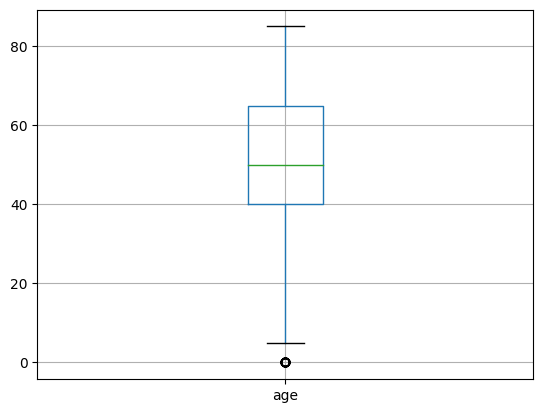

In [168]:
import matplotlib.pyplot as plt

new_df.boxplot(column='age')
plt.show()

#### Localization

I variabeln localization finns 234 unkonwn värden. Jag väljer att ta bort dessa från datasetet då det inte går att anta vad dessa skulle kunna ersättas med. Vi skulle kunna göra en imputation och använda typ av cancer samt lokalisation som proxyn för att fylla i de värden som är unkown, men för det behövs det god kunskap inom onkologi. I detta fall är 234 marginellt till totala antalet observationer på 10 015. 

In [169]:
new_df.localization.value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

### Utforska data

För kvinnor i datamaterialet är cancer uppkommen i nedre extremiteterna vanligast förekommande, följt av på ryggen,  och för män är det på ryggen, följt av nedre extremiteterna. 

In [184]:
new_df.groupby('sex')['localization'].value_counts(normalize=True).mul(100)

sex      localization   
female   lower extremity    25.307557
         back               18.519332
         trunk              14.015817
         upper extremity    10.896309
         abdomen             9.512302
         face                7.644991
         foot                3.800527
         chest               3.119508
         unknown             2.086995
         neck                1.603691
         hand                1.252197
         genital             0.746924
         scalp               0.681019
         ear                 0.659051
         acral               0.153779
male     back               24.916759
         lower extremity    17.110618
         trunk              14.113947
         upper extremity    11.505734
         abdomen            10.858306
         face                7.343692
         chest               4.901961
         foot                2.645209
         scalp               1.794303
         neck                1.757307
         unknown         

### Sambandsanalys

Jag börjar med att omvandla de kvalitativa värden till numeriska värden i raderna för att kunna göra en korrelationsanalys. I variabelen 'localization' kan det bli klurigt att hålla koll på kodningen då de är något fler i antal. Jag gör det ändå i syfte att kunna göra korrelationsanalysen. Följande värden kodar jag: 

sex                     male = 0 
                        female = 1 
                        unknown = 2 

localization            back = 0
                        lower extremity = 1
                        trunk = 2
                        upper extremity = 3
                        abdomen = 4
                        face = 5
                        chest = 6
                        foot = 7
                        neck = 8
                        scalp = 9
                        hand = 10
                        ear = 11
                        genital = 12
                        acral = 13
                        unknown = 14

dx                      nv = 0
                        mel = 1
                        bkl = 2
                        bcc = 3
                        akiec = 4
                        vasc = 5
                        df = 6

Kön

In [174]:
new_df.sex.value_counts()

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

In [134]:
new_df['sex'] = new_df['sex'].replace("female", 1)
new_df['sex'] = new_df['sex'].replace("male", 0)
new_df['sex'] = new_df['sex'].replace("unknown", 2)

In [135]:
# Radera "unkown" eller 2
new_df.drop(new_df[new_df['sex'] >= 2].index, inplace = True)

In [136]:
new_df.dtypes

dx               object
age             float64
sex               int64
localization     object
dtype: object

Localization

In [138]:
new_df['localization'] = new_df['localization'].replace("back", 0)
new_df['localization'] = new_df['localization'].replace("lower extremity", 1)
new_df['localization'] = new_df['localization'].replace("trunk", 2)
new_df['localization'] = new_df['localization'].replace("upper extremity", 3)
new_df['localization'] = new_df['localization'].replace("abdomen", 4)
new_df['localization'] = new_df['localization'].replace("face", 5)
new_df['localization'] = new_df['localization'].replace("chest", 6)
new_df['localization'] = new_df['localization'].replace("foot", 7)
new_df['localization'] = new_df['localization'].replace("neck", 8)
new_df['localization'] = new_df['localization'].replace("scalp", 9)
new_df['localization'] = new_df['localization'].replace("hand", 10)
new_df['localization'] = new_df['localization'].replace("ear", 11)
new_df['localization'] = new_df['localization'].replace("genital", 12)
new_df['localization'] = new_df['localization'].replace("acral", 13)
new_df['localization'] = new_df['localization'].replace("unknown", 14)

In [139]:
new_df.dtypes

dx               object
age             float64
sex               int64
localization      int64
dtype: object

In [140]:
# Radera "unkown" eller 14
new_df.drop(new_df[new_df['localization'] == 14].index, inplace = True)

In [141]:
new_df.localization.value_counts()

0     2190
1     2077
2     1401
3     1118
4     1020
5      745
6      407
7      316
8      168
9      128
10      90
11      56
12      48
13       7
Name: localization, dtype: int64

Cancertyp (dx)

In [145]:
new_df.dx.value_counts()

0    6499
1    1103
2    1076
3     509
4     327
5     142
6     115
Name: dx, dtype: int64

In [144]:
new_df['dx'] = new_df['dx'].replace("nv", 0)
new_df['dx'] = new_df['dx'].replace("mel", 1)
new_df['dx'] = new_df['dx'].replace("bkl", 2)
new_df['dx'] = new_df['dx'].replace("bcc", 3)
new_df['dx'] = new_df['dx'].replace("akiec", 4)
new_df['dx'] = new_df['dx'].replace("vasc", 5)
new_df['dx'] = new_df['dx'].replace("df", 6)

In [154]:
new_df.corr()

,dx,age,sex,localization
dx,1.000000,0.355934,-0.059763,0.098522
age,0.355934,1.000000,-0.170586,0.029642
sex,-0.059763,-0.170586,1.000000,0.011436
localization,0.098522,0.029642,0.011436,1.000000


In [155]:
import seaborn as sns

sns.heatmap(new_df.corr(), annot=True, fmt='.1f') 
# fungerar ej

<AxesSubplot: >

### Bedömning
Det ser inte ut som att variablerna är starkt korrelerade med varanda. Den starkaste korrelationen återfinns mellan variablerna ålder och cancertyp på r = 0.355934, vilket är rimligt med tanke på att med ökad ålder ökar risken för hudcancer då man har utsatts för ackumulerade ultravioletta strålar genom åren. Denna analys kan ge oss en första intryck av vilka variabler som korrelerar med varandra, men det avslöjar inte vilken typ av cancer som är starkast korrelerat till ålder. Jag ska därför utforska det ytterligare. Jag 

### Utvärdering av data

Mitt data är naturligtvis inte komplett, men ett utval har tagits genom observationer och skulle kunna vara ganska representativt i en studie. 